In [1]:
import zipfile
import pathlib
import os
from shutil import move

In [2]:
# Данные были взяты из группы https://t.me/RUElectionData
# Чтобы последующий код заработал просто скачайте последний архив results_*.zip
# и поместите его в подкаталог data/russia_2020_national_voting
# P.S. приветствуется PR о том, как это автоматизировать
data_dir = pathlib.Path('data/russia_2020_national_voting')
tmp_dir = data_dir / 'tmp'
table_dir = data_dir / 'extracted_table'

In [3]:
if not table_dir.is_dir():
    table_dir.mkdir()

for zip_archive in data_dir.iterdir():
    if zip_archive.name[-3:] != 'zip':
        continue
    with zipfile.ZipFile(zip_archive,"r") as zip_ref:
        zip_ref.extract('results.txt', tmp_dir)

    move(tmp_dir / 'results.txt', table_dir / (zip_archive.name[:-3] + 'txt'))

tmp_dir.rmdir()

In [4]:
# Нужен только для того, чтобы без лишних хлопот прочитать данные
import pandas as pd

In [5]:
dataframes = []
for table in table_dir.iterdir():
    dataframes.append(pd.read_csv(table, sep='\t', names=None, encoding='utf-8'))

data_all = pd.concat(dataframes)

In [6]:
data_cleaned = data_all.dropna()

In [7]:
data_cleaned.head(10)

,name,reg,tik,uik,"Число участников голосования, включенных в список участников голосования на момент окончания голосования","Число бюллетеней, выданных участникам голосования","Число бюллетеней, содержащихся в ящиках для голосования",Число недействительных бюллетеней,ДА,НЕТ,url
0,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №1,2277,1925,1925,0,1749,176,http://www.vybory.izbirkom.ru/region/izbirkom?...
1,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №2,2694,2290,2290,7,2117,166,http://www.vybory.izbirkom.ru/region/izbirkom?...
2,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №3,2865,2441,2441,11,2171,259,http://www.vybory.izbirkom.ru/region/izbirkom?...
3,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №4,2054,1669,1669,8,1381,280,http://www.vybory.izbirkom.ru/region/izbirkom?...
4,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №5,714,607,607,1,473,133,http://www.vybory.izbirkom.ru/region/izbirkom?...
5,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),1 Адыгейская,УИК №6,1065,878,878,3,746,129,http://www.vybory.izbirkom.ru/region/izbirkom?...
6,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),2 Гиагинская,УИК №7,2522,2169,2169,32,1651,486,http://www.vybory.izbirkom.ru/region/izbirkom?...
7,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),2 Гиагинская,УИК №8,1833,1558,1558,8,1356,194,http://www.vybory.izbirkom.ru/region/izbirkom?...
8,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),2 Гиагинская,УИК №9,2346,2104,2104,264,1536,304,http://www.vybory.izbirkom.ru/region/izbirkom?...
9,Общероссийское голосование по вопросу одобрени...,Республика Адыгея (Адыгея),2 Гиагинская,УИК №10,1784,1616,1616,6,1378,232,http://www.vybory.izbirkom.ru/region/izbirkom?...


In [8]:
total_votes = data_cleaned['Число бюллетеней, содержащихся в ящиках для голосования']
votes_for = data_cleaned['ДА']
votes_against = data_cleaned['НЕТ']
citizens = data_cleaned['Число участников голосования, включенных в список участников голосования на момент окончания голосования']
# Судя по всему, здесь только ~73% данных
print(f'Явка: {100 * sum(total_votes) / sum(citizens):.2f}%')
print(f'Результат: {100 * sum(votes_for) / sum(total_votes):.2f}%')

Явка: 67.62%
Результат: 78.15%


In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = [12,12]

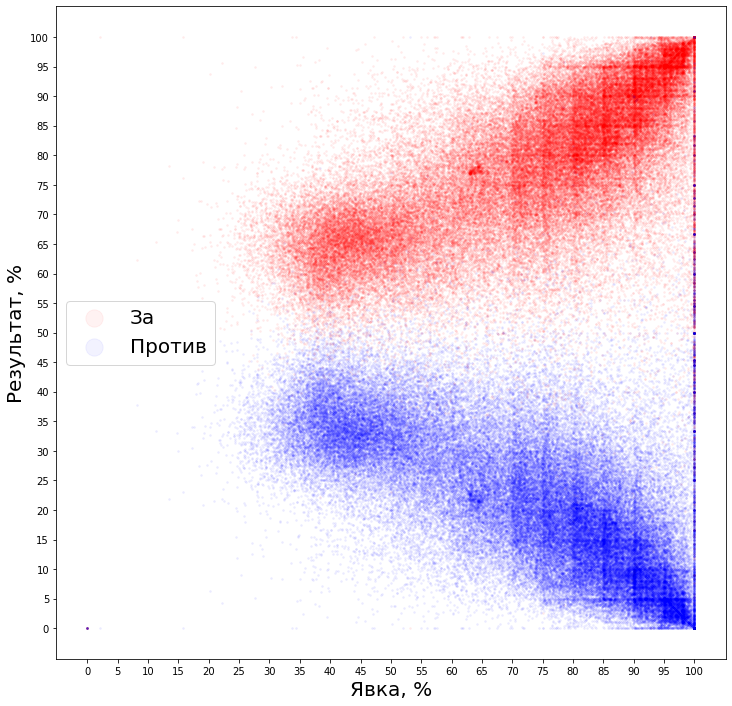

In [11]:
plt.scatter([100 * x / y if y > 0 else 0.0 for x, y in zip(total_votes, citizens)],
            [100 * x / y if y > 0 else 0.0 for x, y in zip(votes_for, total_votes)],
            s=3.0,
            color='red',
            label='За',
            alpha=0.05)
plt.scatter([100 * x / y if y > 0 else 0.0 for x, y in zip(total_votes, citizens)],
            [100 * x / y if y > 0 else 0.0 for x, y in zip(votes_against, total_votes)],
            s=3.0,
            color='blue',
            label='Против',
            alpha=0.05)
plt.xlabel('Явка, %', fontsize=20)
plt.ylabel('Результат, %', fontsize=20)
plt.gca().set_xticks(range(0, 105, 5))
plt.gca().set_yticks(range(0, 105, 5))
# Убрал, так как без явной сетки хорошо видны целочисленные отклонения
# plt.grid(alpha=0.5)
plt.legend(markerscale=10, fontsize=20)
plt.show()

In [12]:
print(f'Участки с 100% явкой: {100 * len([None for x, y in zip(total_votes, citizens) if x == y]) / len(total_votes):.2f}%')

Участки с 100% явкой: 2.29%


In [13]:
vote_for_groups = [0.0 for i in range(101)]
vote_against_groups = [0.0 for i in range(101)]
for x, y, w, z in zip(votes_for, votes_against, total_votes, citizens):
    if z == 0:
        continue
    group = (100 * w) // z
    vote_for_groups[group] += x
    vote_against_groups[group] += y

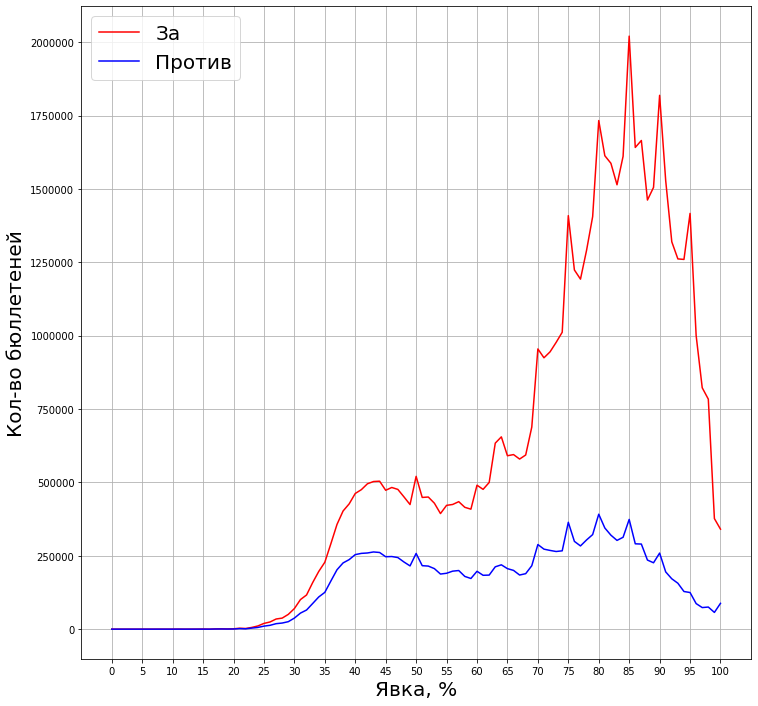

In [14]:
plt.plot([i for i in range(101)],
         vote_for_groups,
         color='red',
         label='За')
plt.plot([i for i in range(101)],
         vote_against_groups,
         color='blue',
         label='Против')
plt.xlabel('Явка, %', fontsize=20)
plt.ylabel('Кол-во бюллетеней', fontsize=20)
plt.gca().set_xticks(range(0, 105, 5))
plt.grid()
plt.legend(markerscale=10, fontsize=20)
plt.show()